<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 7**

## **Contenido**

- <a href="#con"> Concatenación de arreglos</a><br> 
- <a href="#ind"> Indexación y segmentación</a><br>
- <a href="#enm"> Enmascaramiento
- <a href="#sof"> Indexación sofisticada</a><br></a><br>







# **Concatenación de arreglos**


La concatenación, o unión de dos arreglos en NumPy, se realiza principalmente a través de la función `concatenate`:

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]

print(x + y)

[1, 2, 3, 4, 5, 6]


In [ ]:
import numpy as np

xa = np.array(x)
ya = np.array(y)

np.concatenate((x, y))

array([1, 2, 3, 4, 5, 6])

Podemos concatenar más de dos arreglos al tiempo:

In [ ]:
za = np.array([7, 8, 9])

np.concatenate((xa, ya, za))

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

`concatenate` también se puede usar para arreglos bidimensionales. Recuerde que las filas corresponden al eje 1 (axis = 1) y las columnas al eje 0 (axis = 0)


<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/KYPgvhf.png" align="left" hspace="10px" vspace="0px"></p>

In [ ]:
a = np.arange(8,14).reshape(3,2)
print(a)

[[ 8  9]
 [10 11]
 [12 13]]


In [ ]:
np.concatenate([a,a], axis = 0)

array([[ 8,  9],
       [10, 11],
       [12, 13],
       [ 8,  9],
       [10, 11],
       [12, 13]])

Si queremos realizar la concatenación a lo largo del eje 1, debemos especificar el eje por medio de un argumento por palabra clave:

In [ ]:
np.concatenate([a,a], axis = 1)

array([[ 8,  9,  8,  9],
       [10, 11, 10, 11],
       [12, 13, 12, 13]])

La función `vstack()` es equivalente a la concatenación a lo largo del primer eje (axis=0). Al igual que `concatenate()`, recibe como argumento una secuencia de arreglos que, en este caso, deben tener la misma forma a lo largo de todos los ejes, excepto el primero. Los arreglos unidimensionales deben tener la misma longitud:

In [ ]:
a = np.array([1, 2, 3])
b = np.array([[3, 4, 5],
              [6, 7, 8]])

print(a)
print(b)
print("---//----")
print(np.vstack((a,b)))

[1 2 3]
[[3 4 5]
 [6 7 8]]
---//----
[[1 2 3]
 [3 4 5]
 [6 7 8]]


In [ ]:
a1 = a
b1 = np.arange(4,8)

print(a1)
print(b1)
print(a1.shape, b1.shape)
print("---//----")
try:
  print(np.vstack((a1,b1)))
except Exception as e:
  print(e)

[1 2 3]
[4 5 6 7]
(3,) (4,)
---//----
all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 4


Similarmente, la función `hstack()` realiza una concatenación a lo largo del segundo eje (axis=1), y los arreglos que toma como argumento deben coincidir en la forma a lo largo de este eje. Los arreglos unidimensionales pueden ser de cualquier longitud

In [ ]:
a1 = a
b1 = np.arange(4,8)

print(a1)
print(b1)
print(a1.shape, b1.shape)
print("---//----")
try:
  print(np.hstack((a1,b1)))
except Exception as e:
  print(e)

[1 2 3]
[4 5 6 7]
(3,) (4,)
---//----
[1 2 3 4 5 6 7]


<p><a name="ind"></a></p>

# **Indexación y segmentación**

Los arreglos de NumPy tienen la misma semántica de indexación y segmentación que las listas de Python cuando se trata de acceder a elementos o subarreglos. 




In [ ]:
a = np.arange(8)

print(f"a:\t {a}")
print(f"a[3]:\t {a[3]}")
print(f"a[2:6]:\t {a[2:6]}")

a:	 [0 1 2 3 4 5 6 7]
a[3]:	 3
a[2:6]:	 [2 3 4 5]


Debido a que los arreglos de NumPy son n-dimensionales, podemos segmentar a lo largo de todos y cada uno de los ejes. Consideremos la siguiente lista de listas en Python

In [ ]:
L = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(L)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


Por ejemplo, si queremos crear una lista de Python que contenga todas las filas y las primeras dos columnas de la lista L podríamos escribir

In [ ]:
[l[:2] for l in L]

[[1, 2], [4, 5], [7, 8]]

El número de ciclos `for` anidados que se necesita para segmentar listas de listas es igual al número de dimensiones menos uno (en este caso $2-1=1$). 

En NumPy, en lugar de indexar por un segmento, podemos indexar por una tupla de segmentos, cada uno de los cuales actúa en sus propias dimensiones. Definamos el arreglo `L` con NumPy y realicemos la segmentación anterior:


In [ ]:
La = np.arange(1,10).reshape(3,3)
print(La)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
La[:,:2]

array([[1, 2],
       [4, 5],
       [7, 8]])

Los ciclos `for` para la segmentación multidimensional son manejados implícitamente por NumPy. Esto hace que realizar segmentaciones complejas sea mucho más rápido que escribir los ciclos `for` explícitamente en Python. Veamos algunos ejemplos:

In [ ]:
a = np.arange(1,17).reshape(4,4)
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [ ]:
# Seleccionar primera fila
print(a[0])

[1 2 3 4]


In [ ]:
# Segmentar por primera columna
print(a[:,0])

[ 1  5  9 13]


In [ ]:
# Segmentar tercera columna
print(a[:,2])

[ 3  7 11 15]


In [ ]:
#Seleccionar filas pares, columnas impares
print(a[:-1:2,1::2])

[[ 2  4]
 [10 12]]


In [ ]:
# Segmentar matriz 2 x 2 interna  
print(a[1:3,1:3])

[[ 6  7]
 [10 11]]


In [ ]:
#Invertir las primeras 3 filas tomando solo las 3 primeras columnas
print(a[2::-1, :3])

[[ 9 10 11]
 [ 5  6  7]
 [ 1  2  3]]


**Ejercicio 1**: Escriba un programa para crear un nuevo arreglo que sea el promedio de cada triplete consecutivo de elementos del siguiente arreglo

<p><img alt="Colaboratory logo" height="70px" src="https://i.imgur.com/XoHovZd.png" align="left" hspace="10px" vspace="0px"></p>

In [ ]:
a = np.array([1,2,3,2,4,6,1,2,12,0,-12,6]).reshape(4,3)
aver = np.mean(a, axis =1)
print(aver.reshape(1,))


[[ 2.  4.  5. -2.]]


<p><a name="enm"></a></p>

## **Enmascaramiento**

El enmascaramiento aparece cuando deseamos extraer, modificar, o manipular valores en un arreglo de acuerdo con algún criterio.

Ya vimos cómo utilizar ufuncs para operaciones aritméticas básicas y otro tipo de operaciones más complejas. NumPy implementa también operadores de comparación como ufuncs:

In [ ]:
x = np.arange(9).reshape(3,3)
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [ ]:
x < 5

array([[ True,  True,  True],
       [ True,  True, False],
       [False, False, False]])

El resultado es un arreglo booleano. Dado un arreglo booleano, hay una serie de operaciones útiles que podemos implementar. 

Podemos utilizar la función `np.sum` junto con los operadores de comparación para realizar conteos dentro del arreglo:

In [ ]:
print(np.sum(x < 5))

5


Con `np.sum` podemos realizar este tipo de conteos a lo largo de las filas o columnas, utilizando el argumento por palabra clave `axis`:

In [ ]:
print(np.sum(x < 5, axis = 0))

[2 2 1]


In [ ]:
print(np.sum(x < 5, axis = 1))

[3 2 0]


Podemos también tener múltiples condiciones en un conteo, utilizando los operadores lógicos `&` (and) y `|` (or)

In [ ]:
print((x > 1) & (x < 5))
np.sum((x > 1) & (x < 5))

[[False False  True]
 [ True  True False]
 [False False False]]


3

In [ ]:
print((x > 6) | (x < 2))
np.sum((x > 6) | (x < 2))

[[ True  True False]
 [False False False]
 [False  True  True]]


4

Una herramienta muy poderosa es usar los arreglos booleanos como máscaras, para seleccionar subconjuntos particulares de los datos mismos. 

Volviendo a nuestra arreglo `x` anterior, supongamos que queremos un arreglo de todos los valores en `x` que sean menores que, digamos, 5. Para seleccionar estos valores del arreglo, simplemente podemos indexar con este arreglo booleano; esto se conoce como una operación de enmascaramiento:

In [ ]:
x[x < 5]

array([0, 1, 2, 3, 4])

Lo que se devuelve es un arreglo unidimensional con todos los valores que cumplen la condición; en otras palabras, todos los valores en las posiciones en las que el arreglo de máscara es `True`.

**Ejercicio 2:** Escriba una función que, dado un número entero `n`, muestre:

* Un arreglo con los primeros números pares hasta `n`.
* Un arreglo con los primeros números múltiplos de tres hasta `n`.

In [ ]:
def pares_mult3(n):
  a = np.arange(n + 1)
  pares = a[ a % 2 == 0]
  mult3 = a[ a % 3 == 0]
  print(f"Pares:\t\t {pares}")
  print(f"Multiplos de 3:\t {mult3}")
pares_mult3(6)

Pares:		 [0 2 4 6]
Multiplos de 3:	 [0 3 6]


**Ejercicio 3:** Escribir un programa que lea `n` números enteros, calcule y muestre la suma de los pares y el producto de los impares.

In [ ]:
lista = []
entrada = input("Separe con coma los enteros a operar\n")
lista = entrada.split(",")

print(lista)

Separe con coma los enteros a operar
1,2,3,4
['1', '2', '3', '4']


In [ ]:
l = ["1" ,"2", "3"]
arr = np.array(l).astype('int32')
print(arr)
print(np.mean(arr))

[1 2 3]
2.0


<p><a name="sof"></a></p>

# **Indexación sofisticada**

Anteriormente vimos cómo acceder y modificar porciones de arreglos usando índices simples (por ejemplo, `arr[0]`), segmentos (por ejemplo, `arr[: 5]`) y máscaras booleanas (por ejemplo, `arr[arr> 0]`). Veremos ahora otro estilo de indexación de arreglos, conocido como *indexación sofisticada*, la cual nos permite acceder y modificar muy rápidamente subconjuntos complicados de los valores de un arreglo.

La indexación sofisticada es conceptualmente simple: significa pasar una lista de índices en lugar de un entero, para acceder a múltiples elementos del arreglo a la vez. Veamos un ejemplo:

In [ ]:
a = np.arange(10, 20)
print(a)

[10 11 12 13 14 15 16 17 18 19]


In [ ]:
np.array([a[1],a[3], a[7]])

array([11, 13, 17])

In [ ]:
indices = [1,3,7]

a[indices]

array([11, 13, 17])

Con el indexado sofisticado, la forma del resultado refleja la forma del arreglo de índices más que la forma del arreglo que se está indexando:

In [ ]:
indi = np.array([[3, 7],
                 [4, 0]])

a[indi]

array([[13, 17],
       [14, 10]])

El indexado sofisticado funciona también en múltiples dimensiones. Veámoslo en el siguiente ejemplo:

In [ ]:
a = np.arange(12).reshape(3,4)
a.shape = (3,4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Como en la indexación estándar, el primer índice hace referencia a las filas y el segundo a las columnas:

In [ ]:
fila = [0, 1, 2]
colu = [2, 1, 3]

a[fila, colu]

array([ 2,  5, 11])

Los valores el en arreglo corresponden a `a[0,2]`, `a[1,1]` y `a[2,3]` respectivamente. 

#**Motivación**

*¿Cómo generar un arreglo con números aleatorios que sigan un distribución normal o gaussiana?*



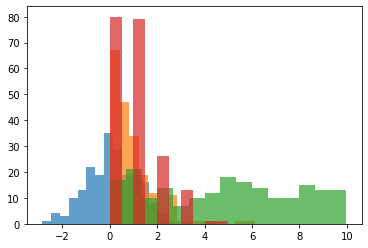

In [ ]:
gauss = np.random.normal(0,1, 200)
expo = np.random.exponential(1, 200)
uni = np.random.uniform(0,10,200)
poiss = np.random.poisson(1, 200)
#print(f"{gauss}\n{expo}\n{uni}\n{poiss}" )

import matplotlib.pyplot as plt

plt.hist(gauss,15, alpha = 0.7)
plt.hist(expo,15,alpha = 0.7)
plt.hist(uni,15,alpha = 0.7)
plt.hist(poiss,alpha = 0.7);